In [1]:
#load pandas, geopandas, and matplotlib
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#load data
data = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv", index_col="Id", parse_dates=True)

data.head(10)

,Neighborhood,Estimate; Total,Margin of Error; Total
Id,,,
1,Allegheny Center,1411.0,196.000000
2,Allegheny West,343.0,96.000000
3,Allentown,2558.0,449.773276
4,Arlington,1852.0,348.188168
5,Arlington Heights,272.0,126.000000
6,Banksville,3858.0,581.107563
7,Bedford Dwellings,1349.0,180.000000
8,Beechview,8078.0,719.658252
9,Beltzhoover,1702.0,343.072879


In [3]:
#calculating mean
data['Estimate; Total'].mean()

3399.197802197802

In [4]:
#setting query mask for lower and upper bound
query_mask = data['Estimate; Total'] >=0

query_mask2 = data['Estimate; Total'] <=3400


In [5]:
##applying query mask to data
pop = data[query_mask & query_mask2]
pop.dropna
pop

,Neighborhood,Estimate; Total,Margin of Error; Total
Id,,,
1,Allegheny Center,1411.0,196.000000
2,Allegheny West,343.0,96.000000
3,Allentown,2558.0,449.773276
4,Arlington,1852.0,348.188168
5,Arlington Heights,272.0,126.000000
7,Bedford Dwellings,1349.0,180.000000
9,Beltzhoover,1702.0,343.072879
12,Bon Air,920.0,171.000000
15,California-Kirkbride,803.0,136.000000


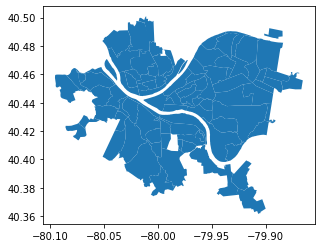

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

Troy Hill
Lower Lawrenceville
Upper Lawrenceville
Morningside
South Oakland
Swisshelm Park

In [9]:
mergedHoods = neighborhoods.merge(pop, how='left', left_on='hood', right_on='Neighborhood') #merging filtered population list with neighborhoods shapefile
mergedHoods[['Neighborhood','Estimate; Total','geometry']].dropna()

,Neighborhood,Estimate; Total,geometry
2,West Oakland,1717.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,2225.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,747.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
6,Spring Hill-City View,2456.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,3398.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,1191.0,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,1545.0,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."
11,Beltzhoover,1702.0,"POLYGON ((-79.99887 40.42174, -79.99853 40.421..."
14,Allentown,2558.0,"POLYGON ((-79.99967 40.42813, -79.99961 40.428..."
17,Fineview,1270.0,"POLYGON ((-80.00198 40.46814, -80.00129 40.467..."


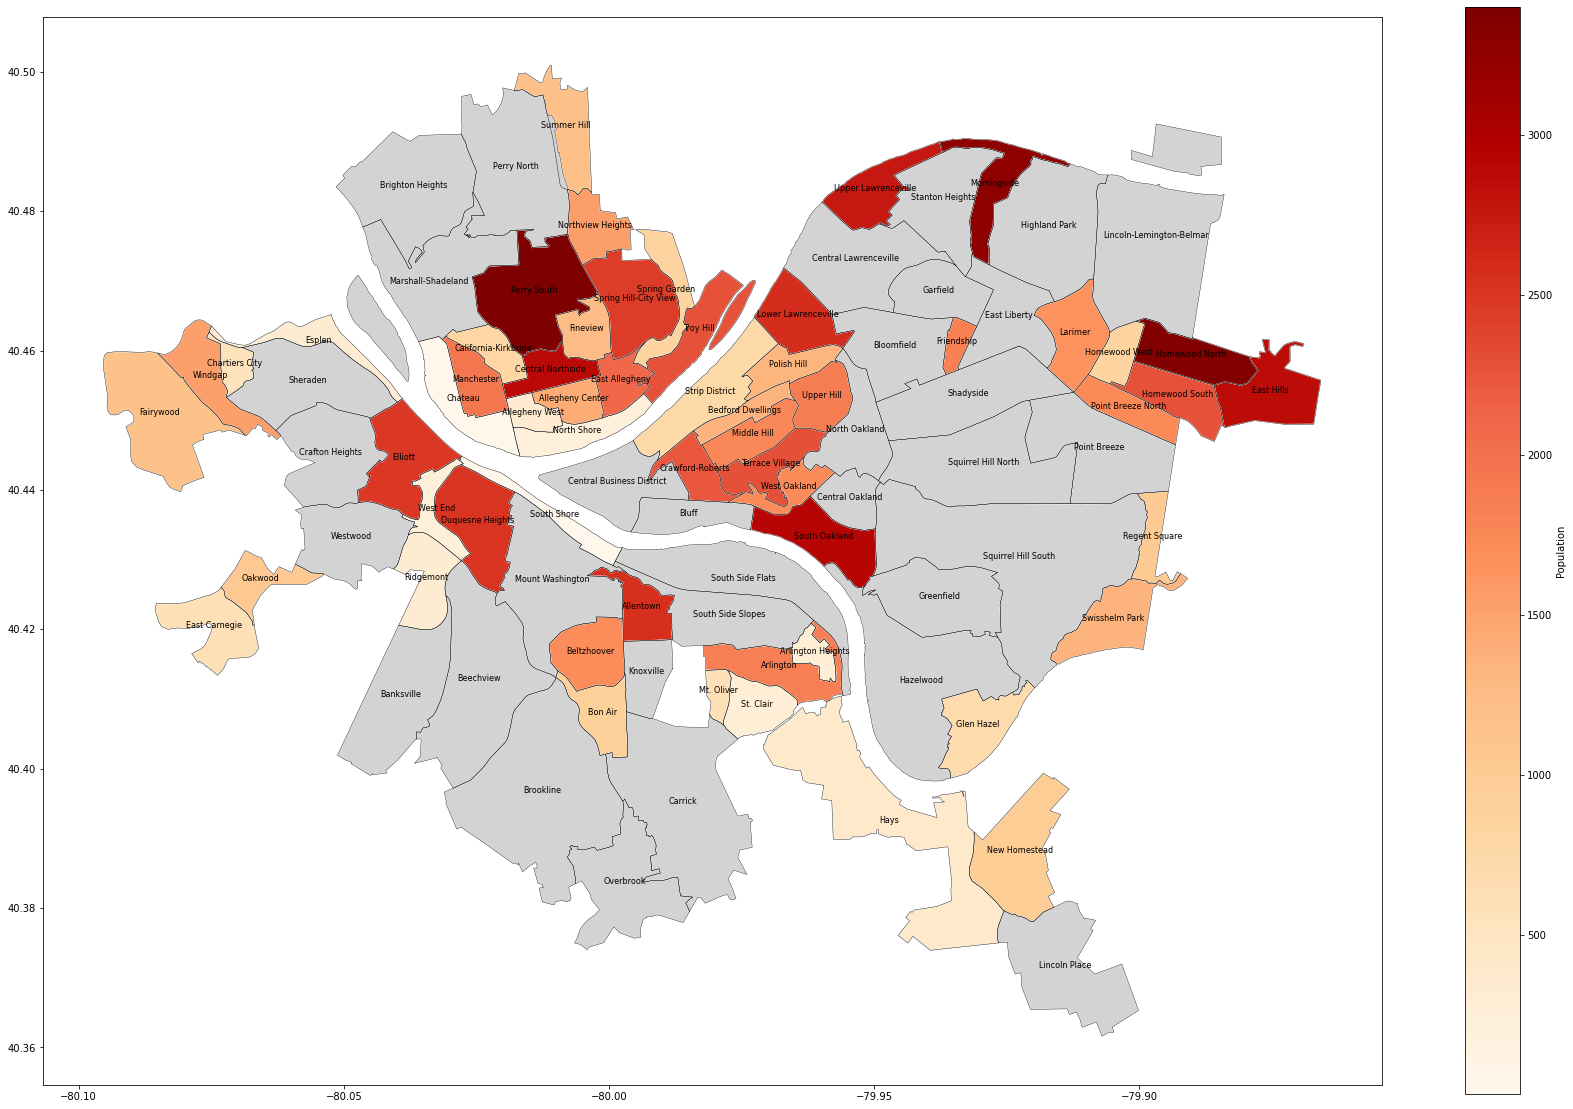

In [8]:
fig = plt.figure(1, figsize=(30,20)) 
ax = fig.add_subplot()
mergedHoods.apply(lambda x: ax.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center',fontsize=8,),axis=1);
mergedHoods.boundary.plot(ax=ax, color='Black', linewidth=.4)
mergedHoods.plot(ax=ax,column='Estimate; Total', # setting the data to be used for coloring
               cmap='OrRd',              # choosing red as our color palette
               edgecolor="white",        # outlining the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Population"}, # labeling the legend
               figsize=(15, 10),         # setting the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
              )

## CONCLUSION BASED ON MY METRIC 

Based on the data I collected, I have narrowed down the list of all the neighborhoods to a list with neighborhoods between 0 and 